In [24]:
import tensorflow        as tf
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import gudhi             

from matplotlib import cm
from mpl_toolkits import mplot3d
from PIL import Image

# Here we import the mnist dataset. 
Downloaded from https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

In [4]:
path = '/Users/luketrujillo/Desktop/Senior_year/machine_learning/mnist_surfaces/mnist.npz'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)

# Recall the structure of the mnist data.
It is a tuple where the first entry contians the training data, and the second entry contains the testing data.

In [267]:
train_images.shape

(60000, 28, 28)

There are 60,000 28x28 images. 

In [270]:
train_images[0].shape

(28, 28)

We can grab one and plot its grayscale. 

In [274]:
img = Image.fromarray(train_images[2])
img.show()

Since it's an image, we can turn it into a surface. Specifically, it will be the graph of a two variable function, where the height is the grayscale value and the inputs are the image pixel coordinates.

In [275]:
Xs = np.linspace(0, 28, 28) #initialize our coordinates
Ys = np.linspace(0, 28, 28)
xdata = [Xs, Ys] #our x-y coordinates
i,j = np.meshgrid(*xdata, indexing = "ij")  #creates the 28x28 grid
train_matrices = train_images[10]

Zs = train_matrices

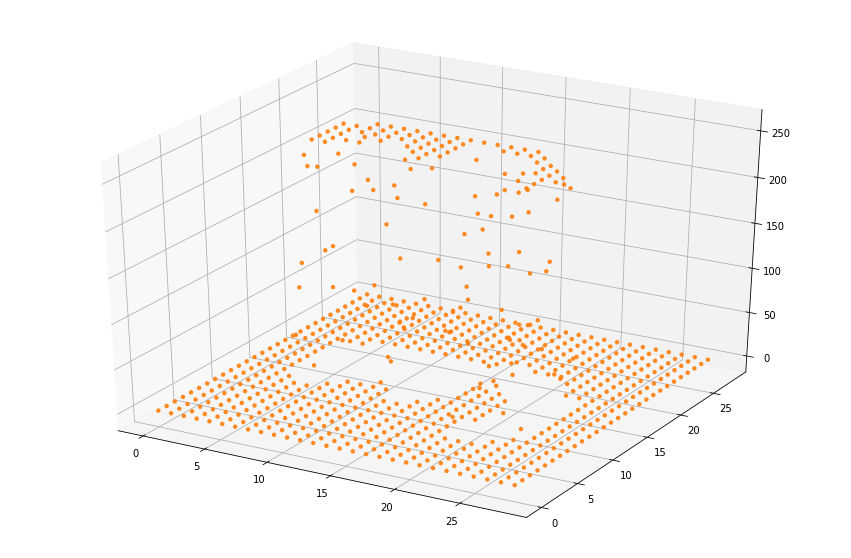

In [277]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
ax.set_facecolor('none')
c = [s['color'] for s in plt.rcParams['axes.prop_cycle']]
ax.scatter(i, j, Zs,  color=c[1], linewidth=0, alpha=0.9)

# Persistence Diagrams
At this point we can create a general function which plots this surface and computes the persistence diagram of the three dimensional surface.

In [5]:
#Given an image, we can compute the 3D coordinates which correspond to the surface representation of the image 
def surface_coordinates(image, lowerbd): #nonzero surface data
    X = [] #initialize our coordinates
    Y = []
    Z = []
    for j in range(0, 28):
        for k in range(0, 28):
            if image[j][k] > lowerbd:
                X.append(j)
                Y.append(k)
                Z.append(image[j][k])
    return X, Y, Z

## How much noise?

We create a lower bound parameter since we don't want to create persistence diagrams which take in points that are zero. This isn't useful information; what we want it to capture the homology of the main structure, which is the surface at nonzero z values. With that said, we may not even want to consider points which are at a height less than 100. Thus the parameter was set so that I could vary it and see how the persistence diagram changed for a fixed image. Thus we're just trying to figure out how much noise to add to the persistence diagrams computations. After testing a few times, I found that the persistence diagram stops changing so much when we set lowerbd to 150 or 175; so either of these values will be fine. 

In [32]:
#Given a surface, we want its persistence diagrams. We can do this pretty directly using its 3D coordinates.

def surface_pers_diag(X,Y,Z, plotPers = False):
    points = []
    for i in range(0, len(X)):
        points.append([ X[i], Y[i], Z[i] ])                                    #Creates a list of triples of 3D points 
    rips = gudhi.RipsComplex(points, max_edge_length=42)                       #Creates ripser complex
    simplex_tree = rips.create_simplex_tree(max_dimension=3)                   #creates simplices
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0) #computes persistence diagram
    
    if plotPers:
        gudhi.plot_persistence_diagram(diag) #plots the points
        plot.show()                          #graphs the points
    return diag

#We also implement the 2D version for later
def twoD_pers_diag(X,Y, plotPers = False):
    points = []
    for i in range(0, len(X)):
        points.append([ X[i], Y[i] ])                                          #Creates a list of triples of 3D points 
    rips = gudhi.RipsComplex(points, max_edge_length=42)                       #Creates ripser complex
    simplex_tree = rips.create_simplex_tree(max_dimension=3)                   #creates simplices
    diag = simplex_tree.persistence(homology_coeff_field=2, min_persistence=0) #computes persistence diagram
    
    if plotPers:
        gudhi.plot_persistence_diagram(diag) #plots the points
        plot.show()                          #graphs the points
    return diag

In [7]:
#We put together our previous two functions to create a general one which plots the surface and the persistence diagram.

def mnist_plot_and_pers_diargam(image, lowerbd, show3Dplot = False, plotPers = False): #the lowerbd is the minimum grayscale value which we'll care about
    if show3Dplot:                  #Set plotme = True if you want to see the 3D representation of the surface.
        Xs = np.linspace(0, 28, 28) #initialize our coordinates
        Ys = np.linspace(0, 28, 28)
        xdata = [Xs, Ys] #our x-y coordinates
        i,j = np.meshgrid(*xdata, indexing = "ij")  #creates the 28x28 grid

        fig = plt.figure(figsize=(15, 10)) #creates a large plotting area
        ax = plt.axes(projection='3d')     #creates axes                               

        cm = plt.get_cmap("rainbow")       #color theme is "rainbow"; can change e.g. "spring", "gist_gray", "hsv"                          
        col = []                           #we want color to vary by height. So we create different colors for each point.
        for m in range(28):                #iterating through all of our points,
            for n in range(28):
                col.append( cm(float(image[m][n])/255)) #we set the color for each point by normalizing by max height 255.
        ax.scatter(i, j, image, c=col) #plots the surface
        ax.view_init(elev = 15, azim=40)
    
    X,Y,Z = surface_coordinates(image, lowerbd)        #creates the coordinates of the surface
    diag = surface_pers_diag(X,Y,Z, plotPers)           #plots the persistence diagram of the surface
    return diag

In [303]:
image = train_images[1]
int(image[16][6])
mydiag = mnist_plot_and_pers_diargam(image, 50)
mydiag

[(2, (14.177446878757825, 15.165750888103101)),
 (2, (12.24744871391589, 13.038404810405298)),
 (2, (10.295630140987, 10.488088481701515)),
 (1, (2.23606797749979, 10.04987562112089)),
 (1, (9.055385138137417, 12.727922061357855)),
 (1, (9.899494936611665, 12.806248474865697)),
 (1, (9.055385138137417, 11.789826122551595)),
 (1, (9.055385138137417, 11.357816691600547)),
 (1, (7.810249675906654, 9.433981132056603)),
 (1, (9.433981132056603, 11.0)),
 (1, (13.076696830622021, 14.594519519326424)),
 (1, (11.575836902790225, 12.84523257866513)),
 (1, (10.63014581273465, 11.832159566199232)),
 (1, (2.23606797749979, 3.0)),
 (1, (8.06225774829855, 8.774964387392123)),
 (1, (11.224972160321824, 11.916375287812984)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4142135623730951, 1.7320508075688772)),
 (1, (1.4

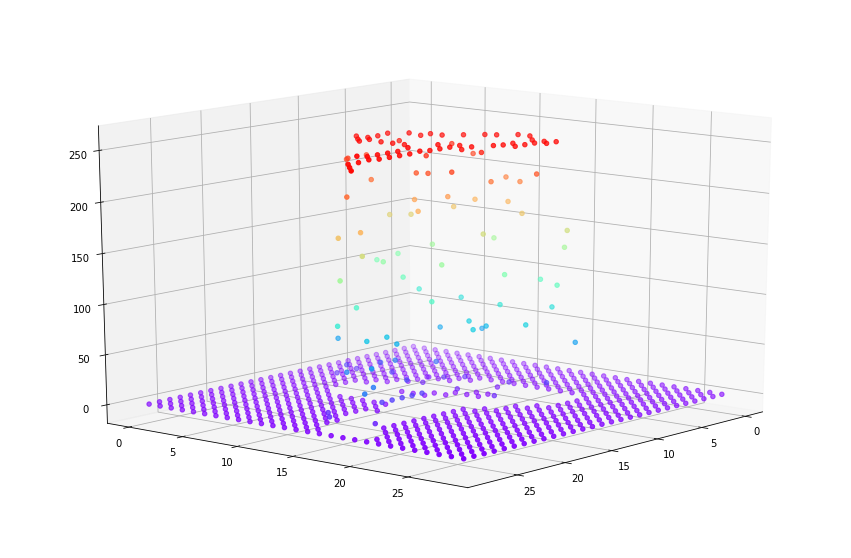

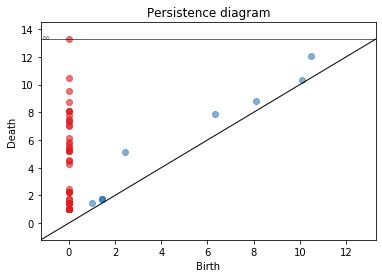

90

In [95]:
image = train_images[4]
mydiag = mnist_plot_and_pers_diargam(image, 175, show3Dplot = True, plotPers = True)
len(mydiag)

## Are persistence diagrams obviously different between obviously different numbers?
Let's pick two clearly different numbers and see if the we can see a difference in their persistence diagrams. We'll compare the numbers eight and the numbers one.

In [121]:
mnist_one = []
mnist_two = []
mnist_three = []
mnist_four = []
mnist_five = []
mnist_six = []
mnist_seven = []
mnist_eight = []
mnist_nine = []

numbers = [1,2,3,4,5,6,7,8,9]
names = ["one", "two", "three", "four", "five", "six", "seven", "eight", "nine"]

for image_index in range(0, len(train_labels)):
    for num in numbers:
        if train_labels[image_index] == num:
            eval("mnist_" + names[num-1]).append(image_index)
            break

In [126]:
print(mnist_one[:10], mnist_eight[:10])

[3, 6, 8, 14, 23, 24, 40, 59, 67, 70] [17, 31, 41, 46, 55, 85, 94, 97, 125, 137]


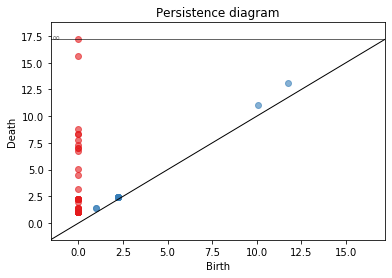

In [100]:
#This is the number one. 
image = train_images[3]

# jpgimg = Image.fromarray(image) #uncomment to see image.
# jpgimg.show()

diag = mnist_plot_and_pers_diargam(image, 200, show3Dplot = False, plotPers = True)

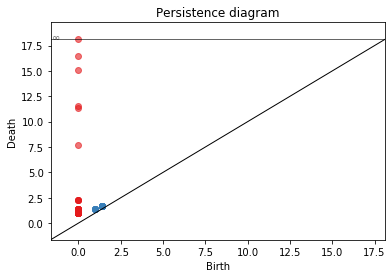

In [113]:
#This is the number one. 
image = train_images[6]

# jpgimg = Image.fromarray(image) #uncomment to see the image
# jpgimg.show()

diag = mnist_plot_and_pers_diargam(image, 200, show3Dplot = False, plotPers = True)

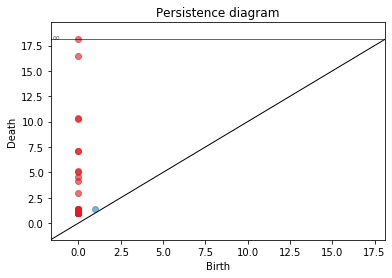

In [49]:
#This is the number one. 
image = train_images[8]

jpgimg = Image.fromarray(image) #uncomment to see image.
jpgimg.show()

diag = mnist_plot_and_pers_diargam(image, 200, show3Dplot = False, plotPers = True)

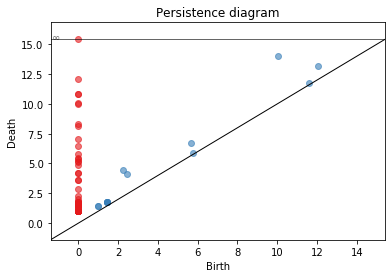

In [120]:
#This is the number eight. 
image = train_images[17]

# jpgimg = Image.fromarray(image) #uncomment to see image.
# jpgimg.show()

diag = mnist_plot_and_pers_diargam(image, 200, show3Dplot = False, plotPers = True)

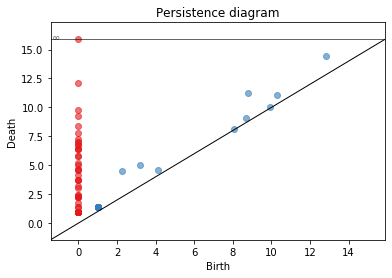

In [119]:
#This is the number eight. 
image = train_images[31]

# jpgimg = Image.fromarray(image) #uncomment to see image.
# jpgimg.show()

diag = mnist_plot_and_pers_diargam(image, 200, show3Dplot = False, plotPers = True)

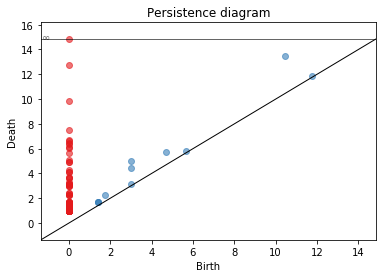

In [146]:
#This is the number eight. 
image = train_images[41]

jpgimg = Image.fromarray(image) #uncomment to see image.
jpgimg.show()

diag = mnist_plot_and_pers_diargam(image, 200, show3Dplot = False, plotPers = True)

In [142]:
image = train_images[41]
image.max()

255

In [40]:
#How about we grab ~100 points, increasing the neigh_range gradually. 

def max_pixel_neighborhood(image, neigh_range): #neighborhood range of 10 works well
    x_coords = []            #x coordinates 
    y_coords = []            #y coordinates
    max_color = image.max()  #maximum intensity present in the pixel; we initally focus on these points, and gradually look at dimmer ones.
    
    for row_index in range(0, 28):  #iterate over all matrix entries
        for col_index in range(0, 28): 
            if max_color-neigh_range< image[row_index][col_index] < max_color: #if in the neighborhood, append
                x_coords.append(col_index)
                y_coords.append(-row_index)
    return x_coords, y_coords

#Now we have our points. An issue we face now is: what if we didn't grab enough? 
#Our solution is to run the code again except with a larger neighborhood. We then iteratively 
#do this until we have a desirable number of points. 

#However, an issue with this is: what if the picture is just really sparse? At some point of doing this, 
#in one of the steps, we'll end up grabbing way too many pixels, i.e., nearly the whole picture. 
#To solve this, we make sure the change between the number of added points in each iteration is not to large. 
    
def max_pixel(image, neigh_range = 10):
    current_x_coords, current_y_coords = max_pixel_neighborhood(image, neigh_range) #current x, y and number of coordinates
    num_pts = len(current_x_coords)
    
    while num_pts < 80: #if the number of points in the neighborhood is small
        neigh_range += 5 #try again; increase neighborhood range
        x_coords, y_coords = max_pixel_neighborhood(image, neigh_range) #then try again w/ larger neighorhood 
        
        change_in_pts = len(x_coords) - num_pts
        
        if change_in_pts > 50: #if however this ends up giving us too many points; i.e., the step is too big
            x_coords, y_coords = current_x_coords, current_y_coords #just use the old points
            break
        else:                  #then we're not done yet; keep iterating
            current_x_coords, current_y_coords = x_coords, y_coords #update the points
            num_pts = len(x_coords)

    x_coords = np.asarray(x_coords) #if we have sufficient points, plot it
    y_coords = np.asarray(y_coords)
    plt.scatter(x_coords, y_coords)

    return x_coords, y_coords       #return the points


84

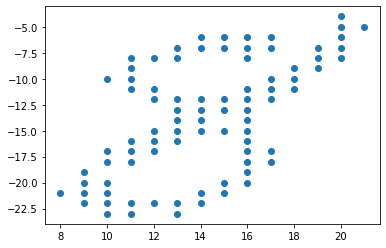

In [41]:
image = train_images[41]
x, y = max_pixel(image)

jpgimg = Image.fromarray(image) #uncomment to see image.
jpgimg.show()

len(x)

Now let's see if this approach really works; we'll repeat our six observations and compare the persistence diagrams. 

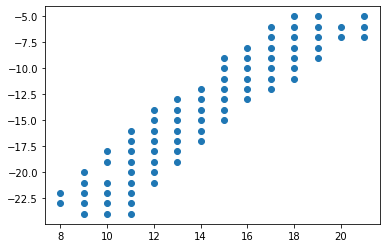

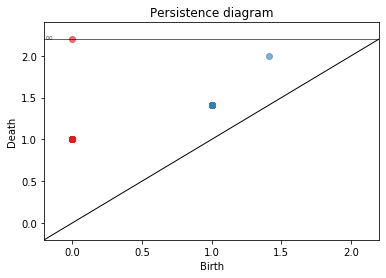

[(1, (1.4142135623730951, 2.0)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0,

In [42]:
image = train_images[3]
x, y = max_pixel(image)
twoD_pers_diag(x,y, True)

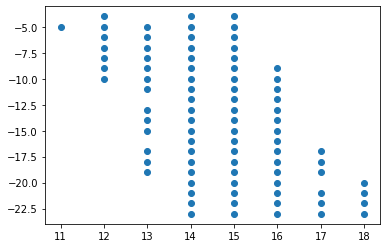

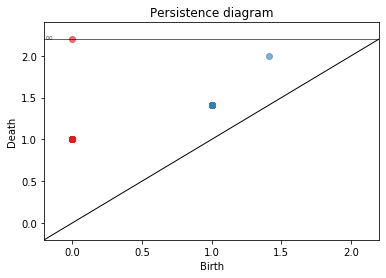

[(1, (1.4142135623730951, 2.0)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0,

In [43]:
image = train_images[6]
x, y = max_pixel(image)
twoD_pers_diag(x,y, True)

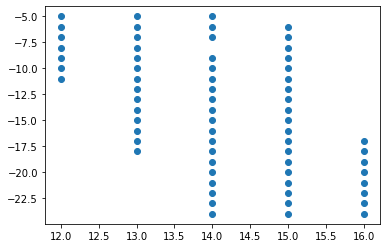

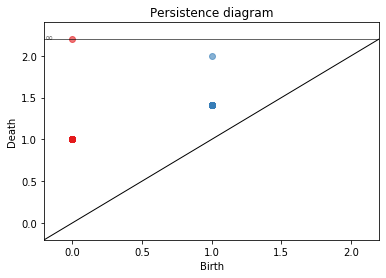

[(1, (1.0, 2.0)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.414213562373

In [44]:
image = train_images[8]
x, y = max_pixel(image)
twoD_pers_diag(x,y, True)

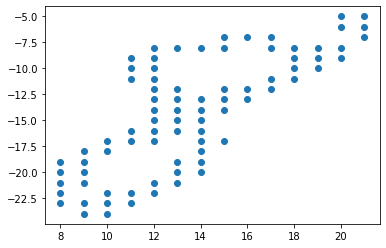

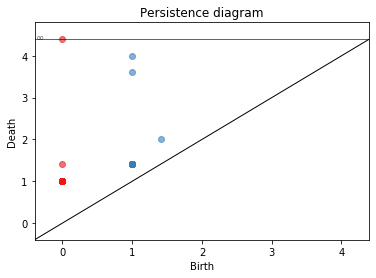

[(1, (1.0, 4.0)),
 (1, (1.0, 3.605551275463989)),
 (1, (1.4142135623730951, 2.0)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (0, (0.0, inf)),
 (0, (0.0, 1.4142135623730951)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 

In [45]:
image = train_images[17]
x, y = max_pixel(image)
twoD_pers_diag(x,y, True)

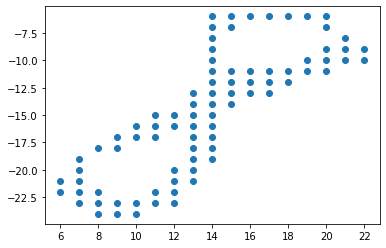

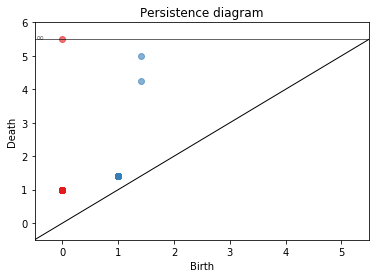

[(1, (1.4142135623730951, 5.0)),
 (1, (1.4142135623730951, 4.242640687119285)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (0, (0.0, inf)),
 (0, (0.0, 

In [46]:
image = train_images[31]
x, y = max_pixel(image)
twoD_pers_diag(x,y, True)

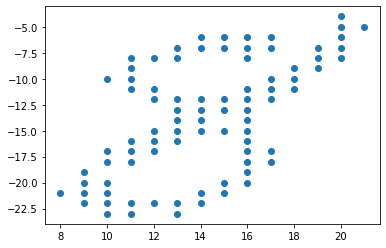

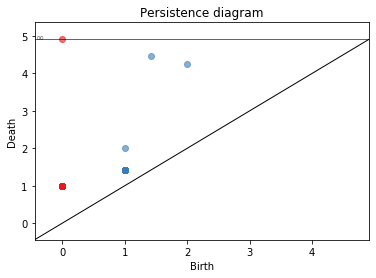

[(1, (1.4142135623730951, 4.47213595499958)),
 (1, (2.0, 4.242640687119285)),
 (1, (1.0, 2.0)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (1, (1.0, 1.4142135623730951)),
 (0, (0.0, inf)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0, (0.0, 1.0)),
 (0,

In [47]:
image = train_images[41]
x, y = max_pixel(image)
twoD_pers_diag(x,y, True)

## How else can we filter the images? 

Take advantage of the fact that numbers are meant to be read upright. They're vertical things; not much horizontal stuff happens. 

1.
One way we could filter is by projecting a surface, and then creating the resulting object by declaring connectivity at a certain height. We can also do this going up and down in just 2D. 


2.
We could do a sort of Vietoris-Rips type of filtration. First we identify the points of maximum intensity; this will be a few points, so we could also look at points with intensity near slightly less than the maximum. Then for each point we connect it to the closest points with the current brightest intensity.  

3.
Another way we could do this is by following a path in the image for which the change in color is the smallest. We start at 255, and then go to another point with value 255, until we run out of those points. One flaw is that we may have more than one choice of direction. A solution would be to then calculate all paths, and then take the most populated one; the others one mean we missed something.

There also isn't a clear place to start. Ideally this would be some kind of snapshot into how the person drew the image. Also, perhaps someone bumped the person drawing and the value 255 does not really indicate what the person wanted to draw. So this is making the assumption that values less than 255 are noise.

4.
We could also take a group of 9 pixels at a time; a sort of "neighborhood", and project it into a vector space, sort of like a sliding window embedding. Would we see some kind of cycles? This would be nice. 

# We now iterate over the entire dataset. 
That is, we compute all of the persistence diagrams. We're interested in the multiset of points in the persistence diagrams, and will store this in a format which is required for it to be understood as input for our neural network in the next step. 

The format will be a dictionary. Each key will correspond to a persistence diagram. The associated value will be a list of numpy arrays. Each array will correspond to a dimension of the persistence diagram. Since in our case we're only using two dimensions, each value will be a list of two numpy arrays, corresponding to the 1st and 2nd dimensions of the persistence diagram.

In [71]:
#Helper function which will help organize the persistence diagram values in each dimension.
def extract_pers_dims(pers_diag, dim): 
    first_to_zero = 0                  #helps later bc numpy is weird
    points_of_dim = np.empty(2)        #intialize the output array
    for pers_tuple in pers_diag:       #iterate over the points of dimension "dim"
        dimension = pers_tuple[0]
        point = pers_tuple[1]
        
        if dimension == dim:                                 #if the dimension of our point is "dim"
            current_array = np.array([point[0], point[1]])
            if first_to_zero == 0:                           #if this is the FIRST point of dimension "dim"
                points_of_dim = current_array                #overwrite previous value of points_of dim
                first_to_zero += 1                           #add 1 to first; will now always execute the "else".      
            else: 
                points_of_dim = np.vstack((points_of_dim, current_array)) #stack onto points of dim
    if first !=0: #if first IS 0, then the dimension we asked for was not achieved by the pers diag. 
        return points_of_dim #returns only if we asked for an appropriate dimension

# The code block below will take a very long time...

In [298]:
diagrams = {}                            #initialize the dict we will populate with pers diagrams
pers_dim_0 = []
pers_dim_1 = []
pers_dim_2 = []
num_images = len(train_images)           #calculate length of train set (we know it's 60000 but let's not get sloppy)
for image_index in range(0, num_images): #iterate over the images
    print(image_index)
    image = train_images[image_index]    #extract "i-th" image
 
    diag = mnist_plot_and_pers_diargam(image, 150) #compute the "i-th" persistence diagram
    
    pers_dim_0.append(extract_pers_dims(diag, 0))
    pers_dim_1.append(extract_pers_dims(diag, 1))
    pers_dim_2.append(extract_pers_dims(diag, 2))
    
diagrams["pers_dim_0"] = pers_dim_0
diagrams["pers_dim_1"] = pers_dim_1
diagrams["pers_dim_2"] = pers_dim_2

## Now we'll try to create a neural network to classify the persistence diagrams. 
To do this, we'll use Perslay developed by Mathieu Carriere: https://github.com/MathieuCarriere/perslay/blob/master/tutorial/tutorialPersLay.ipynb
which resulted in the work https://arxiv.org/abs/1904.09378 . The paper unites previous research focused on vectorizing persistence diagrams so that they can be fed into a neural network in a meaningful way.

To make this work, we borrow code from Carriere's Github. The code is extremely well written in such a way that it can accept labeled persistence diagrams from anywhere; it only requires that we reformat them in a logical way. 

In [82]:
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow import random_uniform_initializer as rui

#Below we initiate perslay.
from perslay.perslay import perslay_channel
from perslay.preprocessing import preprocess
from perslay.visualisation import visualise_diag
from perslay.experiments   import load_diagfeatlabels, generate_diag_and_features, single_run, perform_expe

In [83]:
##########################################
# from https://github.com/MathieuCarriere/perslay/blob/master/tutorial/tutorialPersLay.ipynb
##########################################
import sklearn_tda as tda

### Uncomment the following to process your diagrams (necessary)
thresh = 500

# Whole pipeline
tmp = Pipeline([
        ("Selector",      tda.DiagramSelector(use=True, point_type="finite")),
        ("ProminentPts",  tda.ProminentPoints(use=True, num_pts=thresh)),
        ("Scaler",        tda.DiagramScaler(use=True, scalers=[([0,1], MinMaxScaler())])),
        ("Padding",       tda.Padding(use=True)),
                ])
prm = {filt: {"ProminentPts__num_pts": min(thresh, max([len(dgm) for dgm in diags_tmp[filt]]))} 
       for filt in diags_tmp.keys() if max([len(dgm) for dgm in diags_tmp[filt]]) > 0}

# Apply the previous pipeline on the different filtrations.
D = []
for dt in prm.keys():
    param = prm[dt]
    tmp.set_params(**param)
    D.append(tmp.fit_transform(diags_tmp[dt]))

# For each filtration, concatenate all diagrams in a single array.
diags = []
for dt in range(len(prm.keys())):
    diags.append(np.concatenate([D[dt][i][np.newaxis, :] for i in range(len(D[dt]))], axis=0))

NameError: name 'diags_tmp' is not defined